## Model Evaluation

1. Cross Validation
2. Learning Curve
3. Validation Curve
4. GridSearch
5. Performance Metrics

Optional: ROC AUC Curve

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve,validation_curve ,GridSearchCV
from sklearn.svm import SVC
%matplotlib inline

## Data Preprocessing

In [2]:
### Read Datset  


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))



#### df[row,column]

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

#### Standardize  ###

#### Standardize can make learning converge faster and avoid weights too large or too small   ###

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

##### Fit training set
sc.fit(X_train)

####  Use same fitted Scaler to training and testing

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## K-Fold Corss Validation


當cv = int or None時, 自動套用 StratifiedKFold


reference:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
https://www.itread01.com/content/1541250025.html




In [3]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty = 'l1',C = 0.1,multi_class = 'ovr',solver='liblinear')
lr.fit(X_train_std,y_train)

scores = cross_val_score(estimator =lr,X =  X_train_std,y =  y_train, cv=5, scoring='accuracy',n_jobs = -1)

print ("CV Accuracy: %.2f (+/- %.2f)" %(scores.mean(), scores.std()))
print("Scores for each fold:",scores)

CV Accuracy: 0.97 (+/- 0.03)
Scores for each fold: [0.96       0.96       1.         1.         0.91666667]


## Learning Curve

- Used to evaluate bias and variance
- Default cv: Straitified KFold

Source code can be found from python machine learning p.175

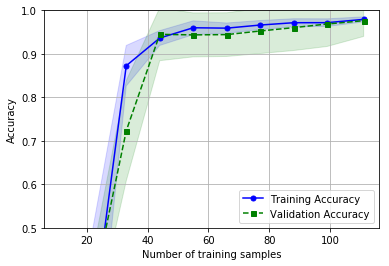

In [4]:


train_sizes,train_scores,test_scores = learning_curve(estimator = lr,
                                                     X = X_train_std,
                                                     y = y_train,
                                                     train_sizes = np.linspace(0.1,1.0,10),
                                                     cv = 10,
                                                     n_jobs = -1)

train_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores,axis = 1)
test_mean = np.mean(test_scores,axis = 1)
test_std = np.std(test_scores,axis = 1)

plt.plot(train_sizes, train_mean,
        color  ='blue', marker = 'o',
        markersize = 5,
        label = 'Training Accuracy')

plt.fill_between(train_sizes,
                train_mean+train_std,
                train_mean-train_std,
                alpha = 0.15,color = 'blue')


plt.plot(train_sizes,test_mean,color ='green',
         linestyle = '--', marker = 's',markersize = 5,
         label = 'Validation Accuracy')

plt.fill_between(train_sizes,
                test_mean+test_std,
                test_mean-test_std,
                alpha = 0.15,color = 'green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.5,1.0])
plt.show()

In [ ]:
### Validation Curve
### GridSearch
### Other metric scores

## Validation Curve

- 改變參數觀察變化
- Note: C 越大, 正規化效果越小

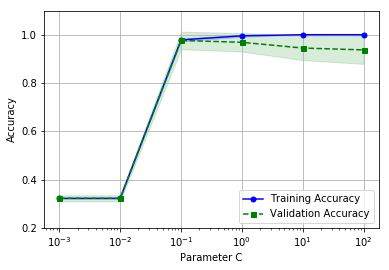

In [12]:
param_range = [0.001,0.01,0.1,1.0,10.0,100.0]

train_scores,test_scores = validation_curve(estimator = lr,
                                            X = X_train_std,
                                            y = y_train,
                                            param_name = 'C',
                                            param_range = param_range,
                                            cv = 10,
                                            n_jobs = -1)

train_mean = np.mean(train_scores,axis = 1)
train_std = np.std(train_scores,axis = 1)
test_mean = np.mean(test_scores,axis = 1)
test_std = np.std(test_scores,axis = 1)

plt.plot(param_range, train_mean,
        color  ='blue', marker = 'o',
        markersize = 5,
        label = 'Training Accuracy')

plt.fill_between(param_range,
                train_mean+train_std,
                train_mean-train_std,
                alpha = 0.15,color = 'blue')


plt.plot(param_range,test_mean,color ='green',
         linestyle = '--', marker = 's',markersize = 5,
         label = 'Validation Accuracy')

plt.fill_between(param_range,
                test_mean+test_std,
                test_mean-test_std,
                alpha = 0.15,color = 'green')

plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.ylim([0.2,1.1])
plt.show()

## GridSearchCV


reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [26]:
tuned_parameters = [{'kernel': ['rbf','linear'],
                     'gamma': [1e-2,1e-3, 1e-4],
                     'C': [0.1,1, 10, 100, 1000]}]

gs = GridSearchCV(estimator = SVC(random_state = 0, verbose = 0),
                 param_grid = tuned_parameters,
                 scoring = 'accuracy',
                 cv = 10,
                 n_jobs = -1)

gs.fit(X_train_std,y_train)

combinations = gs.cv_results_['params']
mean_scores = gs.cv_results_['mean_test_score']
for i in range(0,len(combinations)):
    print('Parameters:',combinations[i])
    print('Mean Scores:',mean_scores[i])
print('\n')
print('Best Combinations:',gs.best_params_)
print('Best Mean Score:',gs.best_score_)



Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Scores: 0.4756410256410256
Parameters: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mean Scores: 0.9525641025641025
Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
Mean Scores: 0.39551282051282055
Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Mean Scores: 0.9525641025641025
Parameters: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean Scores: 0.39551282051282055
Parameters: {'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
Mean Scores: 0.9525641025641025
Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Mean Scores: 0.9839743589743589
Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
Mean Scores: 0.9288461538461539
Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Mean Scores: 0.7173076923076923
Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Mean Scores: 0.9288461538461539
Parameters: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean Scores: 0.39551282051282055
Parameters: {'C': 1, 'gam

## Performance Metrix and  Confusion Matrix

In [31]:
## Performance Matrix
print(metrics.classification_report(y_test, lr.predict(X_test_std)))

## Confusion Matrix
print(metrics.confusion_matrix(y_test,lr.predict(X_test_std)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        22
           3       0.93      1.00      0.96        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

[[19  0  0]
 [ 0 21  1]
 [ 0  0 13]]
